## Data ingestion

In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv(r"C:\projects_endtoend\diamond_price_prediction\notebooks\data\gemstone.csv")

In [4]:
data.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


* here carat representing weight. As carat increases , size of diamond also increases
* table represents width of the surface on diamond

Dataset Source Link : https://www.kaggle.com/competitions/playground-series-s3e8/data?select=train.csv

### Introduction About the Data :
The goal is to predict price of given diamond (Regression Analysis).

There are 10 independent variables (including id):

id : unique identifier of each diamond

carat : Carat (ct.) refers to the unique unit of weight measurement used exclusively to weigh gemstones and diamonds.

cut : Quality of Diamond Cut

color : Color of Diamond

clarity : Diamond clarity is a measure of the purity and rarity of the stone, graded by the visibility of these characteristics under 10-power magnification.

depth : The depth of diamond is its height (in millimeters) measured from the culet (bottom tip) to the table (flat, top surface)

table : A diamond's table is the facet which can be seen when the stone is viewed face up.

x : Diamond X dimension

y : Diamond Y dimension

x : Diamond Z dimension

Target variable:

price: Price of the given Diamond.

In [5]:
data.isnull().sum()  ## missing values

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


In [7]:
data.drop("id",axis=1,inplace=True)

In [8]:
data.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [9]:
data.shape

(193573, 10)

In [10]:
data.duplicated().sum()

0

In [11]:
data.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object

## Categorical vs Numerical

In [12]:
data.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z',
       'price'],
      dtype='object')

In [13]:
## categorical

categorical = data.columns[data.dtypes=='object']

In [14]:
categorical

Index(['cut', 'color', 'clarity'], dtype='object')

In [15]:
## numerical

numerical = data.columns[data.dtypes!='object']

In [16]:
numerical

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price'], dtype='object')

In [17]:
data[categorical].describe().T

,count,unique,top,freq
cut,193573,5,Ideal,92454
color,193573,7,G,44391
clarity,193573,8,SI1,53272


In [18]:
data[numerical].describe().T

,count,mean,std,min,25%,50%,75%,max
carat,193573.0,0.790688,0.462688,0.2,0.40,0.70,1.03,3.50
depth,193573.0,61.820574,1.081704,52.1,61.30,61.90,62.40,71.60
table,193573.0,57.227675,1.918844,49.0,56.00,57.00,58.00,79.00
x,193573.0,5.715312,1.109422,0.0,4.70,5.70,6.51,9.65
y,193573.0,5.720094,1.102333,0.0,4.71,5.72,6.51,10.01
z,193573.0,3.534246,0.688922,0.0,2.90,3.53,4.03,31.30
price,193573.0,3969.155414,4034.374138,326.0,951.00,2401.00,5408.00,18818.00


In [19]:
data[categorical]["clarity"].value_counts()

clarity
SI1     53272
VS2     48027
VS1     30669
SI2     30484
VVS2    15762
VVS1    10628
IF       4219
I1        512
Name: count, dtype: int64

In [20]:
data[categorical]["cut"].value_counts()

cut
Ideal        92454
Premium      49910
Very Good    37566
Good         11622
Fair          2021
Name: count, dtype: int64

#### diamond cut grades: https://www.vrai.com/journal/post/diamond-cut

In [21]:
data[categorical]["color"].value_counts()

color
G    44391
E    35869
F    34258
H    30799
D    24286
I    17514
J     6456
Name: count, dtype: int64

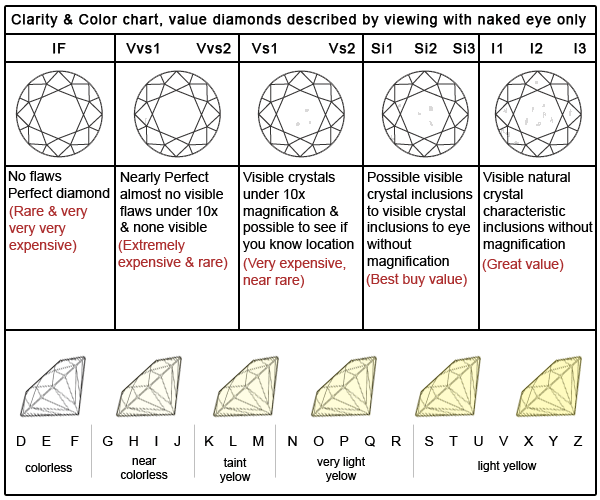

### visualization

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

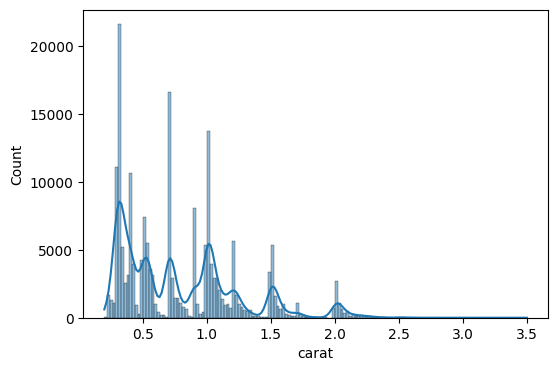

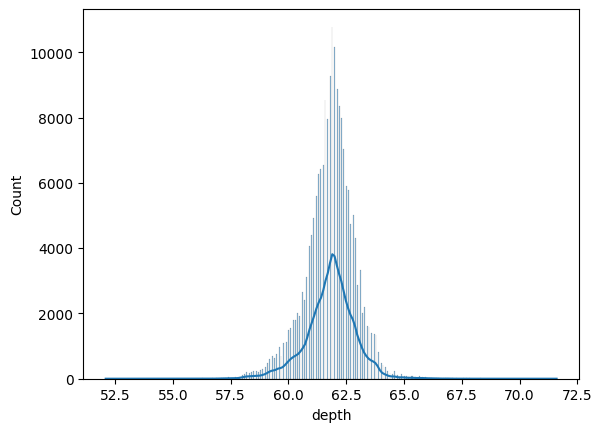

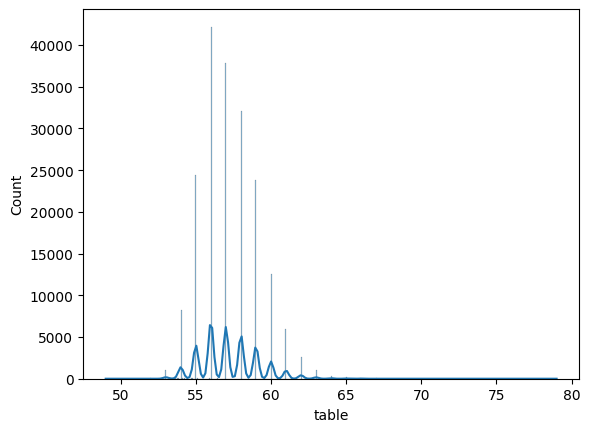

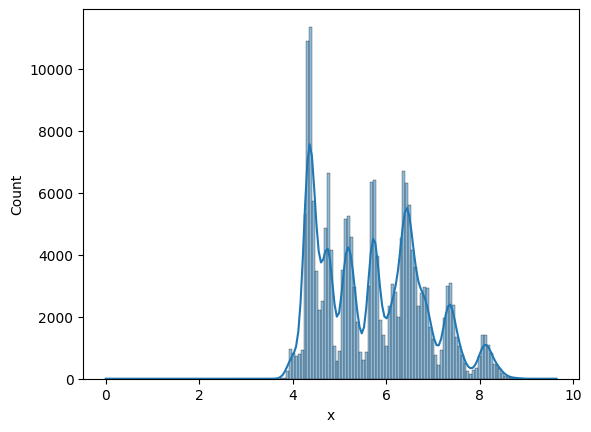

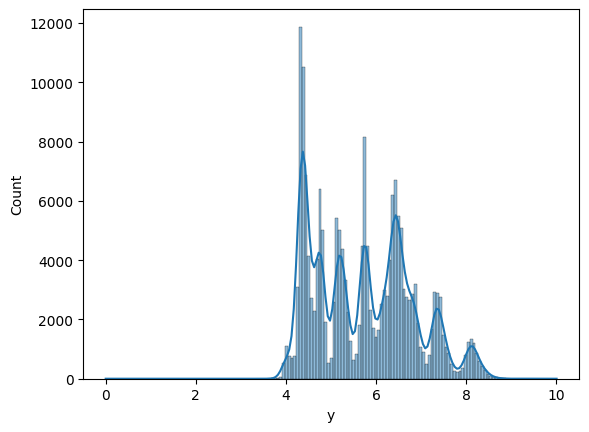

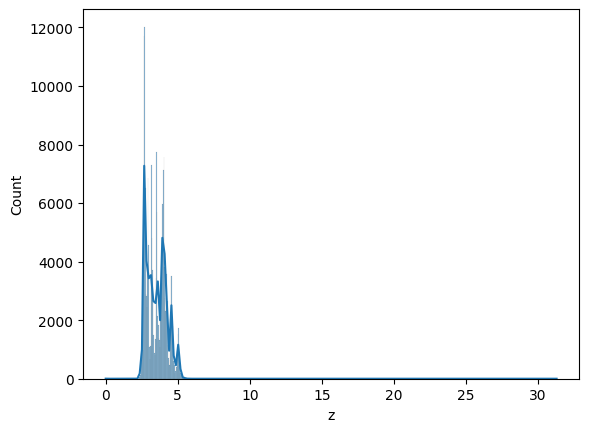

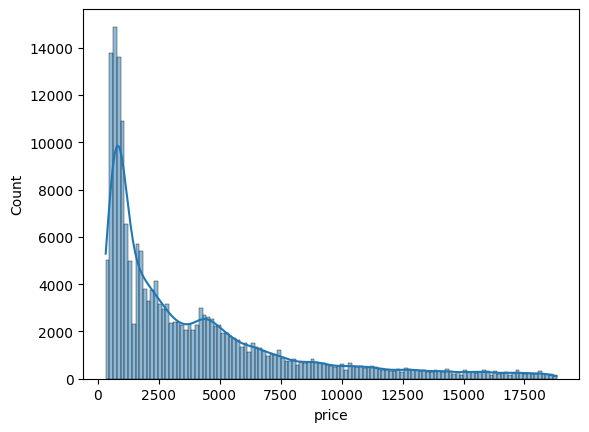

In [23]:
plt.figure(figsize=(6,4))

for col in numerical:
    sns.histplot(data,x=col,kde=True)

    plt.show()


### insights

* if we talk about kohinoor then it is an outlier
* if carat is 0.1-2 then it is not an outlier becoz most of the diamonds fall within this range (diamond with 5 carat will be an outlier)

* here dist. of depth is perfectly normal

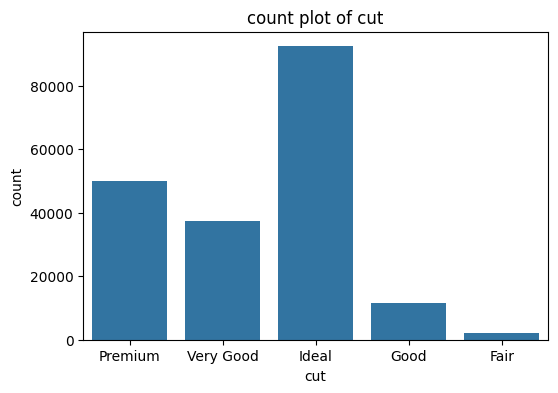

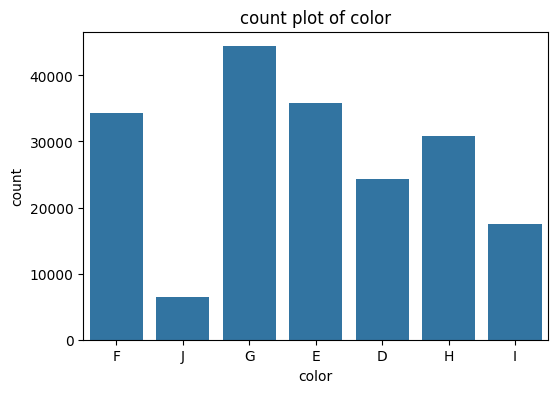

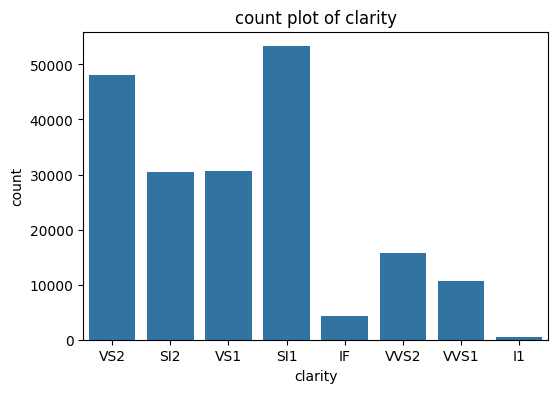

In [25]:
for col in categorical:
    plt.figure(figsize=(6,4))
    sns.countplot(data=data,x=col)
    plt.title(f"count plot of {col}")
    plt.show() 

<Axes: xlabel='color'>

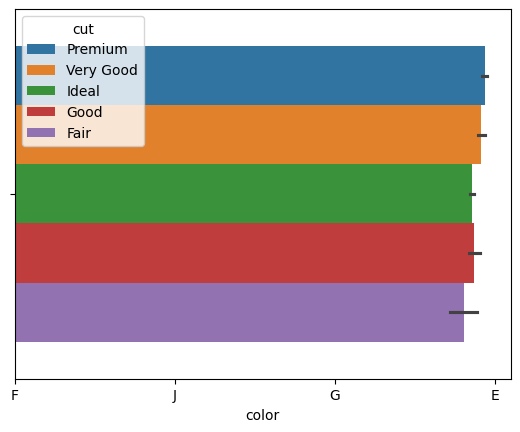

In [28]:
sns.barplot(data=data,x=data['color'],hue=data['cut'])

In [37]:
categorical

Index(['cut', 'color', 'clarity'], dtype='object')

<Axes: ylabel='color'>

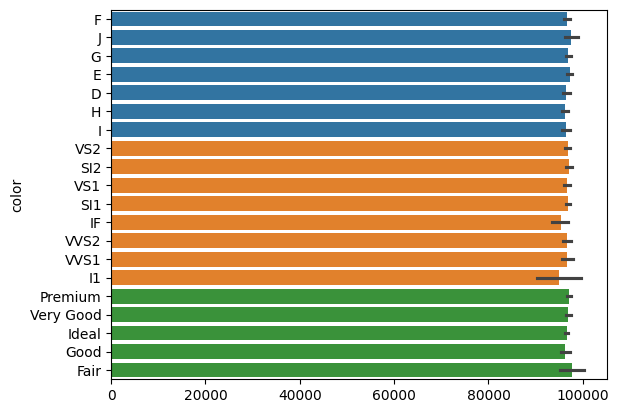

In [43]:
sns.barplot(data['color'])
sns.barplot(data['clarity'])
sns.barplot(data['cut'])

## Correlation (using heatmap)

<Axes: >

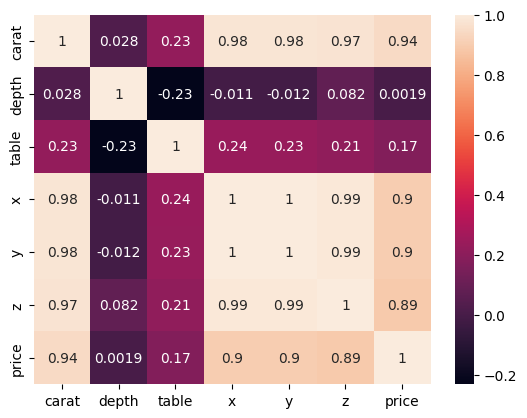

In [53]:
sns.heatmap(data[numerical].corr(),annot=True)

### Insights:

* Here (heatmap) lower intensity is showing the higher value and higher intensity is showing the lower value

* light color showing high correlation and dark color is showing lower correlation(negative).

* carat and price are highly correlated

* carat and depth are not correlated

# Feature Engineering

### encoding

In [54]:
data['color'].unique()

array(['F', 'J', 'G', 'E', 'D', 'H', 'I'], dtype=object)

In [55]:
data['clarity'].unique()

array(['VS2', 'SI2', 'VS1', 'SI1', 'IF', 'VVS2', 'VVS1', 'I1'],
      dtype=object)

In [56]:
data['cut'].unique()

array(['Premium', 'Very Good', 'Ideal', 'Good', 'Fair'], dtype=object)

In [59]:
# oridinal encoding
cut_map={"Fair":1,"Good":2,"Very Good":3,"Premium":4,"Ideal":5}
clarity_map = {"I1":1,"SI2":2 ,"SI1":3 ,"VS2":4 , "VS1":5 , "VVS2":6 , "VVS1":7 ,"IF":8}
color_map = {"D":1 ,"E":2 ,"F":3 , "G":4 ,"H":5 , "I":6, "J":7}

In [60]:
cut_map

{'Fair': 1, 'Good': 2, 'Very Good': 3, 'Premium': 4, 'Ideal': 5}

In [61]:
clarity_map

{'I1': 1,
 'SI2': 2,
 'SI1': 3,
 'VS2': 4,
 'VS1': 5,
 'VVS2': 6,
 'VVS1': 7,
 'IF': 8}

In [62]:
color_map

{'D': 1, 'E': 2, 'F': 3, 'G': 4, 'H': 5, 'I': 6, 'J': 7}

#### mapping cut, color, clarity 

In [63]:
data['cut'].map(cut_map)

0         4
1         3
2         5
3         5
4         4
         ..
193568    5
193569    4
193570    3
193571    3
193572    2
Name: cut, Length: 193573, dtype: int64

In [64]:
data['clarity'].map(clarity_map)

0         4
1         2
2         5
3         5
4         4
         ..
193568    6
193569    6
193570    3
193571    3
193572    2
Name: clarity, Length: 193573, dtype: int64

In [65]:
data['color'].map(color_map)

0         3
1         7
2         4
3         4
4         4
         ..
193568    1
193569    4
193570    3
193571    1
193572    2
Name: color, Length: 193573, dtype: int64

In [66]:
data["cut"]=data["cut"].map(cut_map)
data["color"]=data["color"].map(color_map)
data["clarity"]=data["clarity"].map(clarity_map)

In [67]:
data.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,4,3,4,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,3,7,2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,5,4,5,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,5,4,5,61.6,56.0,4.38,4.41,2.71,666
4,1.70,4,4,4,62.6,59.0,7.65,7.61,4.77,14453
